In [65]:
pip install xgboost

     |████████████████████████████████| 157.5 MB 71 kB/s s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('sea.csv', names = ['feature1','feature2','feature3','label'])

In [5]:
df

,feature1,feature2,feature3,label
0,6.677259,5.152133,2.982455,0
1,9.874437,8.817701,4.786266,1
2,7.118725,2.990575,1.964403,0
3,6.128244,8.449696,2.604408,1
4,7.592623,0.859845,5.763160,0
...,...,...,...,...
59995,4.760386,7.501301,5.680291,1
59996,7.873042,7.951943,1.213854,1
59997,8.430418,9.531408,1.034550,0
59998,6.438425,8.759620,6.009597,1


Train the model on first 15000 rows. 

In [41]:
df1  = df[:15000]

In [74]:
X = df1[['feature1', 'feature2', 'feature3']]
y = df1['label']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=369)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [88]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
              ('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier())
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['label0', 'label1']
    for name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred, target_names=target_names))
            results.append(cv_results)
            names.append(name)
            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [89]:
final = run_exps(X_train, y_train, X_test, y_test )

LogReg
              precision    recall  f1-score   support

      label0       0.90      0.78      0.84      1325
      label1       0.89      0.95      0.92      2425

    accuracy                           0.89      3750
   macro avg       0.90      0.87      0.88      3750
weighted avg       0.89      0.89      0.89      3750

RF
              precision    recall  f1-score   support

      label0       0.89      0.78      0.83      1325
      label1       0.89      0.95      0.92      2425

    accuracy                           0.89      3750
   macro avg       0.89      0.86      0.87      3750
weighted avg       0.89      0.89      0.89      3750

KNN
              precision    recall  f1-score   support

      label0       0.87      0.77      0.82      1325
      label1       0.88      0.94      0.91      2425

    accuracy                           0.88      3750
   macro avg       0.88      0.85      0.86      3750
weighted avg       0.88      0.88      0.88      3750

SVM
 

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:27:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:27:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:27:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:27:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:27:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
              precision    recall  f1-score   support

      label0       0.88      0.78      0.83      1325
      label1       0.89      0.94      0.91      2425

    accuracy                           0.89      3750
   macro avg       0.88      0.86      0.87      3750
weighted avg       0.89      0.89      0.88      3750



In [90]:
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.038100,0.009285,0.895111,0.894676,0.895111,0.893989,0.870932,LogReg
1,0.021183,0.008667,0.892000,0.892674,0.892000,0.890428,0.884797,LogReg
2,0.019653,0.008570,0.893778,0.893592,0.893778,0.892092,0.875101,LogReg
3,0.104564,0.010936,0.886222,0.886869,0.886222,0.883835,0.861654,LogReg
4,0.063977,0.008777,0.891556,0.892432,0.891556,0.889477,0.867684,LogReg
5,1.087744,0.090689,0.886667,0.885909,0.886667,0.885707,0.873830,RF
6,1.085636,0.091433,0.889778,0.889844,0.889778,0.888452,0.871950,RF
7,1.067408,0.091869,0.890667,0.890097,0.890667,0.889173,0.878223,RF
8,1.055411,0.091838,0.876444,0.877171,0.876444,0.873528,0.861527,RF
9,1.066165,0.091216,0.883111,0.882890,0.883111,0.881308,0.863585,RF


In [91]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

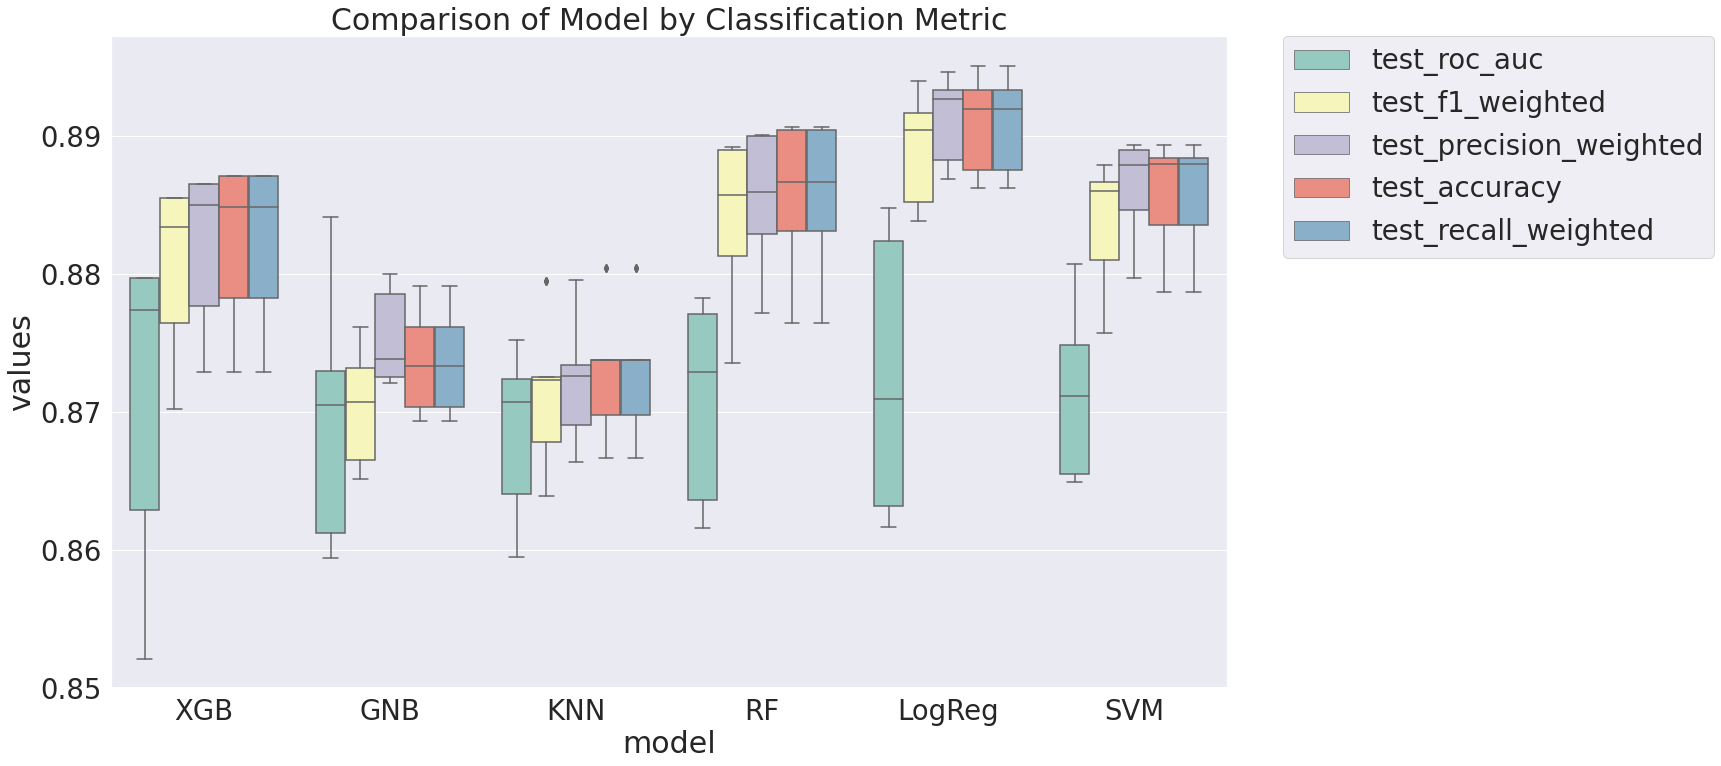

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

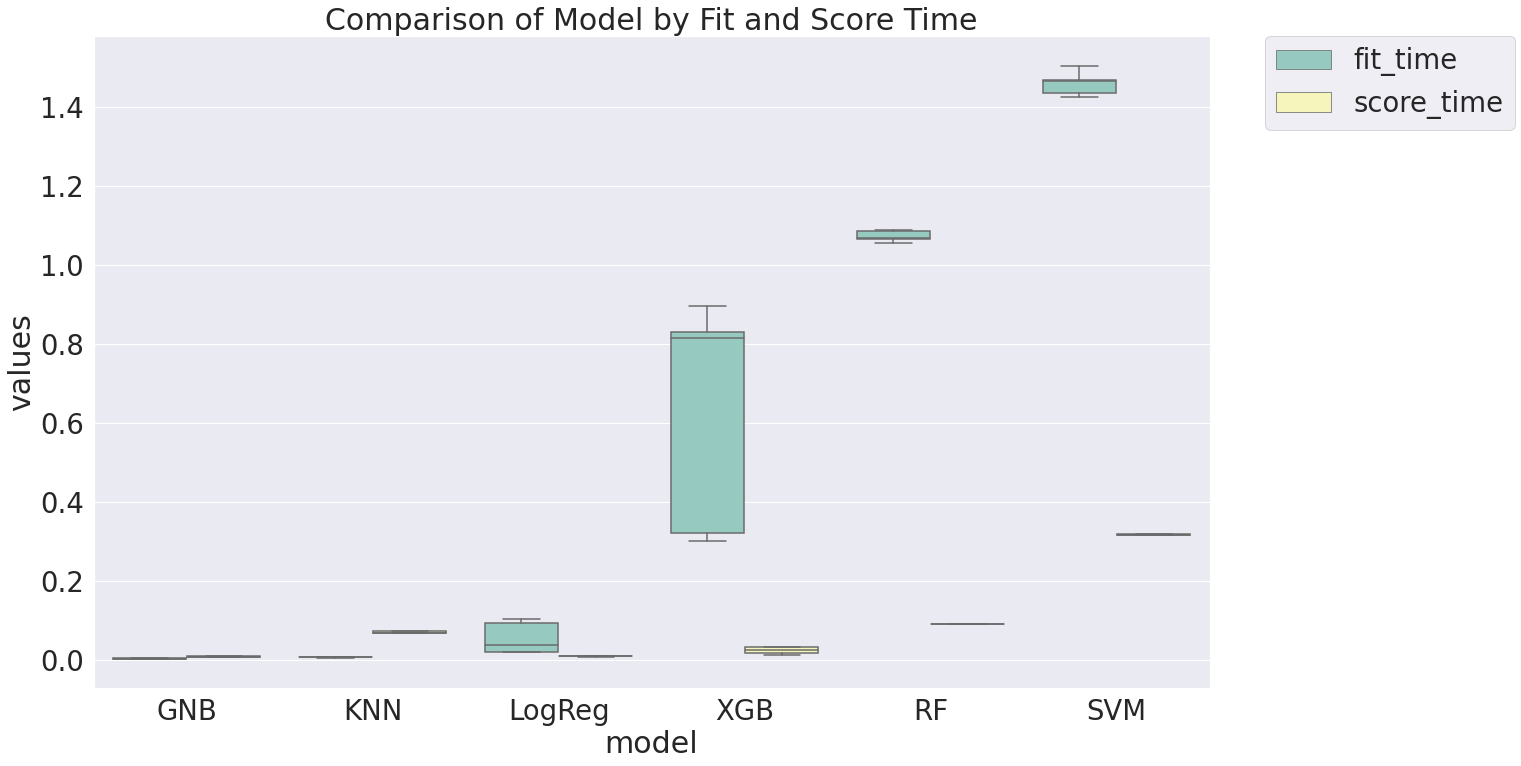

In [93]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)